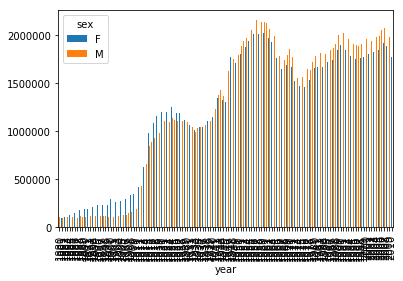

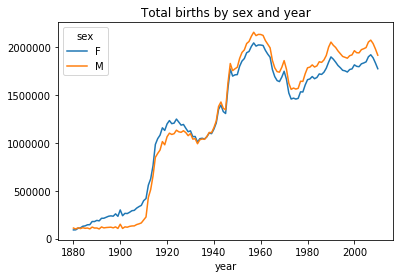

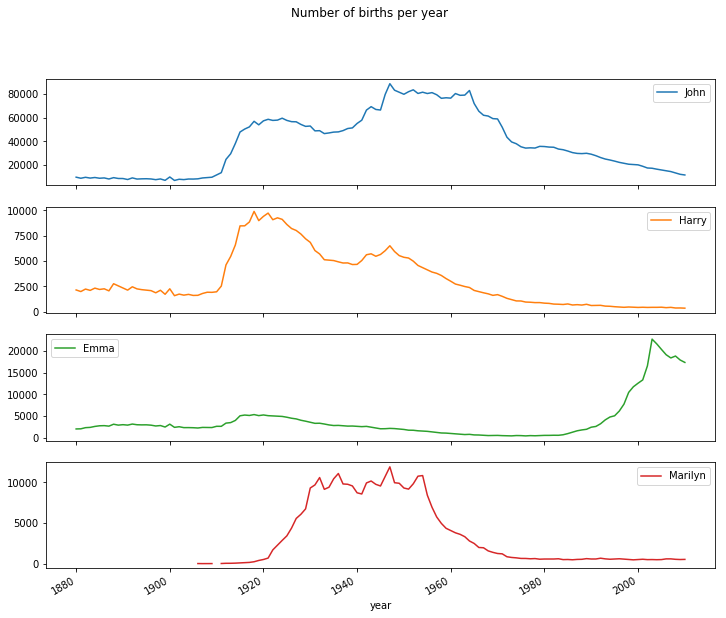

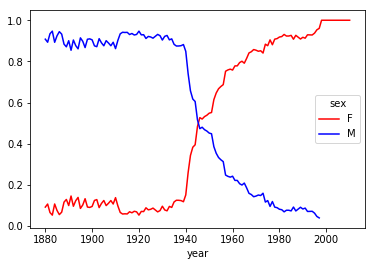

In [7]:
#Importing matplotlib for plotting graph
import matplotlib

#Importing pandas library
import pandas as pd

#SUM OF MALE AND FEMALES
names1880 = pd.read_csv('D:\database\yob1880.txt',names=['name', 'sex', 'births'])

names1880.groupby('sex').births.sum() 



#US BABY NAMES 1880-2010
years = range(1880, 2011)
pieces = [] 
columns = ['name', 'sex', 'births']
for year in years:    
    path = 'D:\database\yob%d.txt' % year    
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year    
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

#Aggregating the data at the year and sex level using pivot_table
total_births = names.pivot_table('births', index='year',columns='sex', aggfunc=sum)
total_births.plot.bar()
total_births.plot(title='Total births by sex and year')

#Grouping the data by year and sex
def add_prop(group):    
    group['prop'] = group.births / group.births.sum()    
    return group 
names = names.groupby(['year', 'sex']).apply(add_prop)

def get_top1000(group):    
    return group.sort_values(by='births', ascending=False)[:1000] 
grouped = names.groupby(['year', 'sex']) 
top1000 = grouped.apply(get_top1000) 

# Drop the group index, not needed 
top1000.reset_index(inplace=True, drop=True)

pieces = [] 
for year, group in names.groupby(['year', 'sex']):    
    pieces.append(group.sort_values(by='births', ascending=False)[:1000]) 
top1000 = pd.concat(pieces, ignore_index=True)

#ANALYZING NAME TRENDS

boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

total_births = top1000.pivot_table('births', index='year',columns='name',aggfunc=sum)

subset = total_births[['John', 'Harry', 'Emma', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,title="Number of births per year")

#BOY NAMES THAT BECAME GIRL NAMES (and vice versa)

all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum() 
filtered.pivot_table('births', index='year',columns='sex', aggfunc='sum')
table = filtered.pivot_table('births', index='year',columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()
table.plot(style={'M': 'blue', 'F': 'red'})
                                